In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import folium

In [11]:
df = pd.read_csv(r'files/Mass Shootings Dataset.csv', encoding = "ISO-8859-1", parse_dates=["Date"])

In [12]:
df

S#                                       Title  \
0      1               Las Vegas Strip mass shooting   
1      2                  San Francisco UPS shooting   
2      3           Pennsylvania supermarket shooting   
3      4        Florida awning manufacturer shooting   
4      5            Rural Ohio nursing home shooting   
5      6                    Fresno downtown shooting   
6      7            Fort Lauderdale airport shooting   
7      8                       Cascade Mall shooting   
8      9                 Baton Rouge police shooting   
9     10                      Dallas police shooting   
10    11                  Orlando nightclub massacre   
11    12                       Ferguson, MO Drive by   
12    13              Forestville, Maryland Drive-by   
13    14                          Halifax County, VA   
14    15            Tire-Slashing revenge escalation   
15    16                  Chicago Rap video Shootout   
16    17                 Texas family murder-suicide   
17    18             Alabama highway random shooting   
18    19                    Long Beach Street murder   
19    20        Albuquerque, NM House party shooting   
20    21            Memphis, TN gas station shooting   
21    22         Chicago Birthday Party Bus Shooting   
22    23  Albuquerque, NM Family restaurant shooting   
23    24                          Richmond, Virginia   
24    25                   Louisburg, North Carolina   
25    26                     Lawrenceburg, Tennessee   
26    27         Greenhill, AL Family murder-suicide   
27    28                              Sherman, Texas   
28    29           Sherman, TX Family murder-suicide   
29    30                        Louisville, Kentucky   
..   ...                                         ...   
368  369    Electromagnetic Systems Laboratory (ESL)   
369  370                   Pinellas Park High School   
370  371             Shopping centers spree killings   
371  372                   Palm Bay Shopping Centers   
372  373                   Fergus County High School   
373  374       United States Postal Service shooting   
374  375             Post office in Edmond, Oklahoma   
375  376                  New York Technical College   
376  377                         Atlanta Post Office   
377  378                  Goddard Junior High School   
378  379              San Ysidro McDonald's massacre   
379  380         McDonald's restaurant in San Ysidro   
380  381                   Dallas nightclub shooting   
381  382                      Ianni's Club in Dallas   
382  383               49th Street Elementary School   
383  384                        Johnston Post Office   
384  385                     Wah Mee Club in Seattle   
385  386                       Welding shop shooting   
386  387                       Welding shop in Miami   
387  388                          Valley High School   
388  389                University of South Carolina   
389  390          Grover Cleveland Elementary School   
390  391                         Cal State Fullerton   
391  392        Los Angeles Computer Learning Center   
392  393                           Olean High School   
393  394              Clara Barton Elementary School   
394  395                New Orleans Police Shootings   
395  396                         St. Aloysius Church   
396  397                  Rose-Mar College of Beauty   
397  398               University of Texas at Austin   

                      Location       Date  \
0                Las Vegas, NV 2017-10-01   
1            San Francisco, CA 2017-06-14   
2              Tunkhannock, PA 2017-06-07   
3             Orlando, Florida 2017-06-05   
4           Kirkersville, Ohio 2017-05-12   
5           Fresno, California 2017-04-18   
6     Fort Lauderdale, Florida 2017-01-06   
7               Burlington, WA 2016-09-23   
8              Baton Rouge, LA 2016-07-17   
9                Dallas, Texas 2016-07-07   
10            Orlando, Florida 2016-06

In [13]:
df.iloc[373]

S#                                                                    374
Title                               United States Postal Service shooting
Location                                                 Edmond, Oklahoma
Date                                                  1986-08-20 00:00:00
Summary                 Postal worker Patrick Sherrill, 44, opened fir...
Fatalities                                                             15
Injured                                                                 6
Total victims                                                          21
Mental Health Issues                                             Unclear 
Race                                                                White
Gender                                                               Male
Latitude                                                          35.6672
Longitude                                                        -97.4294
Name: 373, dtype: object

In [14]:
df[['Fatalities', 'Injured', 'Total victims']].describe()

Fatalities     Injured  Total victims
count  398.000000  398.000000     398.000000
mean     5.015075    6.251256      10.934673
std      5.721916   26.645677      30.204271
min      0.000000    0.000000       3.000000
25%      2.000000    1.000000       4.000000
50%      4.000000    3.000000       6.000000
75%      6.000000    5.000000      10.000000
max     58.000000  515.000000     573.000000

In [15]:
# Vegas 36.095157, -115.171832

df.loc[0,'Latitude'] = 36.095157
df.loc[0,'Longitude'] = -115.171832

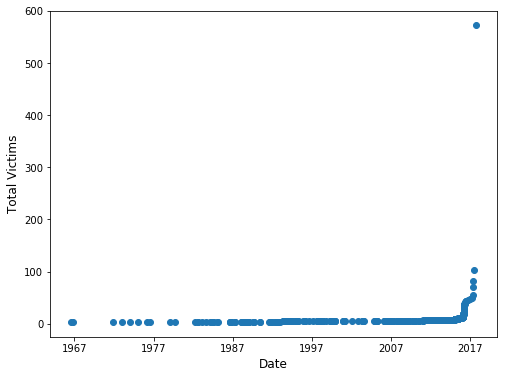

In [16]:
df2 = df.sort_values('Date')


plt.figure(figsize=(8,6))
plt.scatter(np.sort(df2['Date']), np.sort(df2['Total victims'].values))
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Victims', fontsize=12)
plt.savefig("images/victims_date.png", dpi = 300, bbox_inches = 'tight')
plt.show()


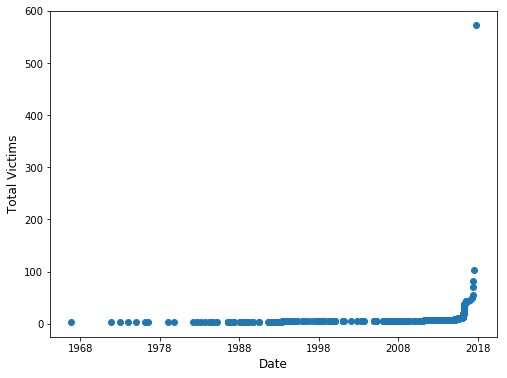

In [17]:
df3 = df[:-1]

plt.figure(figsize=(8,6))
plt.scatter(np.sort(df3['Date']), np.sort(df3['Total victims'].values))
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Victims', fontsize=12)
plt.savefig("images/victims_date_nv.png", dpi = 300, bbox_inches = 'tight')
plt.show()

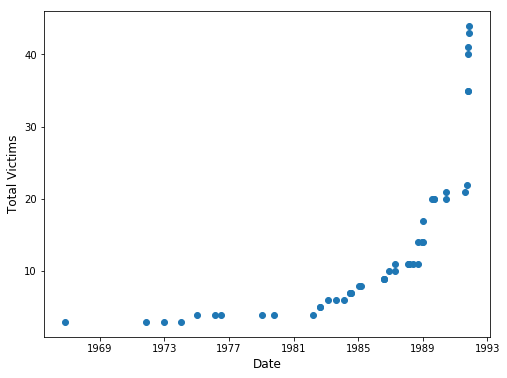

In [18]:
df4 = df[-50:-1]

plt.figure(figsize=(8,6))
plt.scatter(np.sort(df4['Date']), np.sort(df4['Total victims'].values))
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Victims', fontsize=12)
plt.savefig("images/victims_date_50.png")
plt.show()


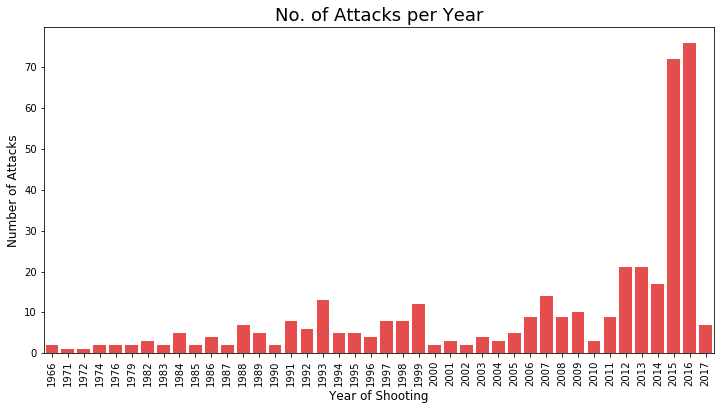

In [24]:
import seaborn as sns

df['Year'] = df['Date'].dt.year

cnt_srs = df['Year'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color='red')
plt.xticks(rotation='vertical')
plt.xlabel('Year of Shooting', fontsize=12)
plt.ylabel('Number of Attacks', fontsize=12)
plt.title('No. of Attacks per Year', fontsize=18)
plt.savefig("images/Attacks_year.png")
plt.show()

In [ ]:
import branca


m = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=3)

def add_marker(row):
    if not np.isnan(row['Latitude']):
        html = "<h1>" + row['Title'] + "</h1>" 
        html += "<p>"
        html += "Date: " + row['Date'].strftime("%a, %d %B %Y")
        html += "<br>Fatalities: " + str(row['Fatalities'])
        html += "<br>Injured: " + str(row['Injured'])
        html += "<br><br>" + str(row['Summary'])
        html += "</p>"
        
        iframe = branca.element.IFrame(html=html, width=500, height=300)
        popup = folium.Popup(iframe, max_width=500)
        
        
        marker = folium.CircleMarker([row['Latitude'], row['Longitude']], 
                                     radius=row['Fatalities'], 
                                     color='red', 
                                     popup=popup)
        marker.add_to(m)

df.apply(add_marker, axis=1)
m

In [ ]:
m.save(r"shooting_map.html")